In [1]:
import json

In [2]:
with open('bos_2019.json') as f:
  data = json.load(f)

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(data)
df.head()

,id,game_date,game_season,team_id,opponent_id,team_points,opponent_points,is_team_home,is_overtime
0,12677,2018-10-03,2019,31,39,0,7,False,False
1,12678,2018-10-04,2019,31,36,4,0,False,False
2,12679,2018-10-08,2019,31,37,6,3,True,False
3,12680,2018-10-11,2019,31,55,4,1,True,False
4,12681,2018-10-13,2019,31,38,8,2,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               82 non-null     object
 1   game_date        82 non-null     object
 2   game_season      82 non-null     object
 3   team_id          82 non-null     object
 4   opponent_id      82 non-null     object
 5   team_points      82 non-null     object
 6   opponent_points  82 non-null     object
 7   is_team_home     82 non-null     object
 8   is_overtime      82 non-null     object
dtypes: object(9)
memory usage: 5.9+ KB


In [6]:
numeric_cols = ['id','game_season', 'team_id', 'opponent_id', 'team_points', 'opponent_points']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, downcast='integer', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               82 non-null     int16 
 1   game_date        82 non-null     object
 2   game_season      82 non-null     int16 
 3   team_id          82 non-null     int16 
 4   opponent_id      82 non-null     int16 
 5   team_points      82 non-null     int16 
 6   opponent_points  82 non-null     int16 
 7   is_team_home     82 non-null     object
 8   is_overtime      82 non-null     object
dtypes: int16(6), object(3)
memory usage: 3.0+ KB


In [8]:
df['game_date'] = pd.to_datetime(df['game_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               82 non-null     int16         
 1   game_date        82 non-null     datetime64[ns]
 2   game_season      82 non-null     int16         
 3   team_id          82 non-null     int16         
 4   opponent_id      82 non-null     int16         
 5   team_points      82 non-null     int16         
 6   opponent_points  82 non-null     int16         
 7   is_team_home     82 non-null     object        
 8   is_overtime      82 non-null     object        
dtypes: datetime64[ns](1), int16(6), object(2)
memory usage: 3.0+ KB


In [10]:
bool_dict = {'True': 1, 'False': 0}

df['is_team_home'].replace(bool_dict, inplace=True)
df['is_overtime'].replace(bool_dict, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               82 non-null     int16         
 1   game_date        82 non-null     datetime64[ns]
 2   game_season      82 non-null     int16         
 3   team_id          82 non-null     int16         
 4   opponent_id      82 non-null     int16         
 5   team_points      82 non-null     int16         
 6   opponent_points  82 non-null     int16         
 7   is_team_home     82 non-null     int64         
 8   is_overtime      82 non-null     int64         
dtypes: datetime64[ns](1), int16(6), int64(2)
memory usage: 3.0 KB


In [12]:
df.head()

,id,game_date,game_season,team_id,opponent_id,team_points,opponent_points,is_team_home,is_overtime
0,12677,2018-10-03,2019,31,39,0,7,0,0
1,12678,2018-10-04,2019,31,36,4,0,0,0
2,12679,2018-10-08,2019,31,37,6,3,1,0
3,12680,2018-10-11,2019,31,55,4,1,1,0
4,12681,2018-10-13,2019,31,38,8,2,1,0


In [13]:
def team_win(row):
    return 1 if row['team_points'] >= row['opponent_points'] else -1

df['is_team_win'] = df.apply(team_win, axis=1)

df.head()

,id,game_date,game_season,team_id,opponent_id,team_points,opponent_points,is_team_home,is_overtime,is_team_win
0,12677,2018-10-03,2019,31,39,0,7,0,0,-1
1,12678,2018-10-04,2019,31,36,4,0,0,0,1
2,12679,2018-10-08,2019,31,37,6,3,1,0,1
3,12680,2018-10-11,2019,31,55,4,1,1,0,1
4,12681,2018-10-13,2019,31,38,8,2,1,0,1


In [14]:
team_win_dict = df[['game_date', 'is_team_win']].to_dict(orient='records')

current_streak = None
last_outcome = None

for game in team_win_dict:
    outcome = game['is_team_win']
    
    if current_streak is None:
        current_streak = outcome
        last_outcome = outcome
    else:
        if outcome != last_outcome:
            current_streak = outcome
        else:
            current_streak += outcome
    
    game['streak'] = current_streak
    last_outcome = outcome

In [15]:
len(team_win_dict)

82

In [16]:
team_win_df = pd.DataFrame(team_win_dict)

team_win_df = team_win_df[['game_date', 'streak']]

team_win_df.head()

,game_date,streak
0,2018-10-03,-1
1,2018-10-04,1
2,2018-10-08,2
3,2018-10-11,3
4,2018-10-13,4


In [17]:
df = pd.merge(df, team_win_df, how='inner', on='game_date')

df.head(25)

,id,game_date,game_season,team_id,opponent_id,team_points,opponent_points,is_team_home,is_overtime,is_team_win,streak
0,12677,2018-10-03,2019,31,39,0,7,0,0,-1,-1
1,12678,2018-10-04,2019,31,36,4,0,0,0,1,1
2,12679,2018-10-08,2019,31,37,6,3,1,0,1,2
3,12680,2018-10-11,2019,31,55,4,1,1,0,1,3
4,12681,2018-10-13,2019,31,38,8,2,1,0,1,4
5,12682,2018-10-17,2019,31,56,2,5,0,0,-1,-1
6,12683,2018-10-18,2019,31,55,2,3,0,1,-1,-2
7,12684,2018-10-20,2019,31,57,1,2,0,1,-1,-3
8,12685,2018-10-23,2019,31,37,4,1,0,0,1,1
9,12686,2018-10-25,2019,31,40,3,0,1,0,1,2


In [21]:
df['goal_diff'] = df['team_points'] - df['opponent_points']

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='game_date'>

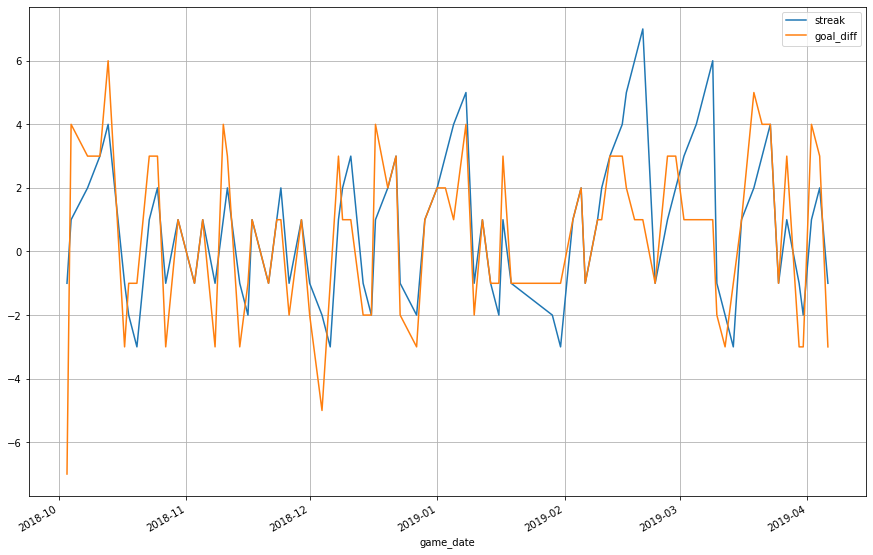

In [29]:
df.plot(x='game_date', y=['streak', 'goal_diff'], kind='line', figsize=(15,10), grid=True)